# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [24]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy import stats
import seaborn as sns

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


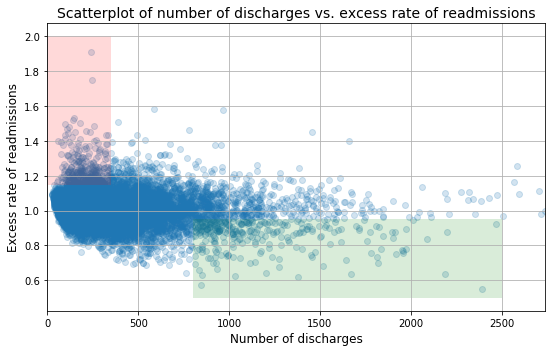

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [6]:
#Find the number of observations in the dataset
clean_hospital_read_df.shape

(11578, 12)

In [8]:
clean_hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 16857 to 13666
Data columns (total 12 columns):
Hospital Name                 11578 non-null object
Provider Number               11578 non-null int64
State                         11578 non-null object
Measure Name                  11578 non-null object
Number of Discharges          11578 non-null int64
Footnote                      81 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11578 non-null object
End Date                      11578 non-null object
dtypes: float64(5), int64(2), object(5)
memory usage: 1.1+ MB


## A. Do you agree with the above analysis and recommendations? Why or why not? ##

The data in clean_hospital_read_df is not fully cleaned. There are 11578 rows in the dataset, but four columns from Excess Readmission Rate to Number of Readmissions have 11497 non-null values, telling us there are null values in the dataset.

In the Initial Observations section the analysis states "there is a greater incidence of lower rates of readmissions (area shaded green)". It is somewhat difficult to see that there is a greater incidence of lower rates of readmissions. The area in green seems to mostly mirror the readmission rates above one. It would help to see the analysis numerically as well.

The Statistics section talks about facilities < 100 while the Policy section talks about facilities < 300. These should be consistent amounts. If the analysis is going to flag certain thresholds, the recommendations should follow those thresholds as well.

In the Conclusions section it states there is "significant correlation between hospital capacity (number of discharges) and readmission rates". This is said without any statistical evidence. Seeing the analysis and numerical results would be helpful as opposed to just the plot.

## B. Provide support for your arguments and your own recommendations with a statistically sound analysis ##

In [14]:
#Clean the data
clean_hospital_read_df_clean = clean_hospital_read_df[pd.notnull(clean_hospital_read_df['Excess Readmission Ratio'])]

In [15]:
#Recheck whether there are nulls in the data
clean_hospital_read_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11497 entries, 1832 to 13666
Data columns (total 12 columns):
Hospital Name                 11497 non-null object
Provider Number               11497 non-null int64
State                         11497 non-null object
Measure Name                  11497 non-null object
Number of Discharges          11497 non-null int64
Footnote                      0 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11497 non-null object
End Date                      11497 non-null object
dtypes: float64(5), int64(2), object(5)
memory usage: 1.1+ MB


### 1. Setup an appropriate hypothesis test.

Null hypothesis: There is no correlation between hospital capacity (number of discharges) and readmission rates.

Alternative hypothesis: There is a correlation between hospital capacity (number of discharges) and readmission rates.

### 2. Compute and report the observed significance value (or p-value).

In [21]:
cor_co, p = stats.pearsonr(clean_hospital_read_df_clean['Number of Discharges'], clean_hospital_read_df_clean['Excess Readmission Ratio'])
print('Correlation Coefficient', cor_co)
print('p-value', p)

('Correlation Coefficient', -0.097397943510793533)
('p-value', 1.222547377680967e-25)


The very small p-value leads us to reject the null hypothesis that there is no correlation between number of discharges and readmission rates. There is a very small chance (1.22 x e-25) that the results are random. Although the correlation coefficient is also very small. The value of r is always between +1 (positive correlation) and –1 (negative correlation), and when r is zero there is no correlation.

### 3. Report statistical significance for  α = .01

If the p-value is less than or equal to the alpha (p < .01), then we reject the null hypothesis, and we say the result is statistically significant. In this case, the p-value is (1.22 x e-25), so the result is statistically significant.

### 4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

The p-value tells us the result is statistically significant and we can reject the null hypothesis. This would lead us to believe there is a correlation between the number of discharges and readmission rates. Although because the correlation coefficient is very close to zero, practically, there is a very weak correlation between the number of discharges and readmission rates.

I would not make recommendations to the client without more analysis. I do not feel that there is enough information to support the recommendations made.

### 5. Look at the scatterplot above.
#### What are the advantages and disadvantages of using this plot to convey information?
In the scatterplot above, the coloring of each of the points allows people to see density of the points. The darker the points are, the more dense the points are. The disadvantage is that it is difficult to tell the relationship between the two variables. A regression line would be very helpful. 

#### Construct another plot that conveys the same information in a more direct manner.
The plot below includes the regression line showing the relationship between Number of Discharges and Excess Readmission Ratio.

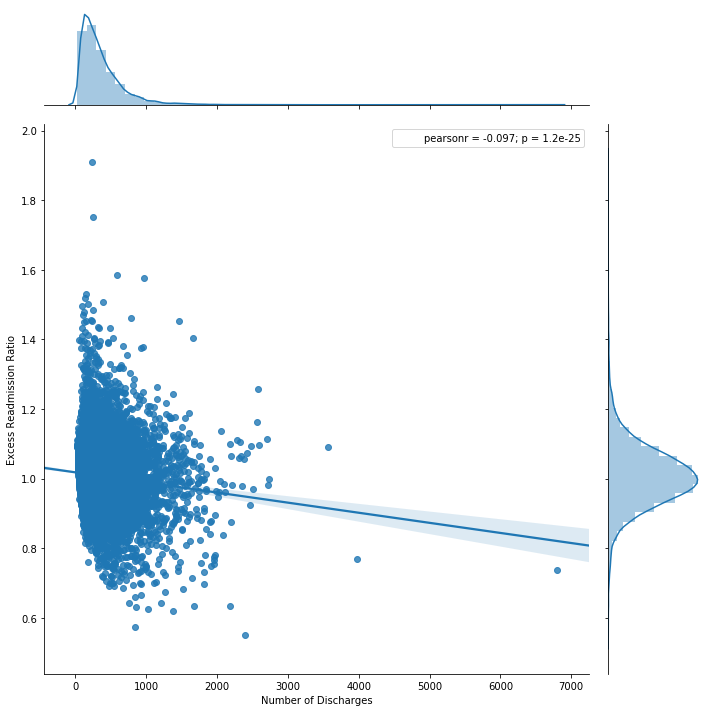

In [37]:
sns.jointplot('Number of Discharges', 'Excess Readmission Ratio', data=clean_hospital_read_df_clean, kind='reg',
             size=10)
plt.show()